In [1]:
# add because this is what we used during lesson 1
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

In [2]:
# add per the hands on page
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [3]:
# add data
Diamonds = pd.read_csv('/Users/music/Desktop/Diamonds.csv')

In [ ]:
# using the variables (carat, cut, color, clarity) to predict the price of diamonds

In [29]:
# renaming values into numbers for the cut column for Linear Regression Model
print(Diamonds['cut'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [34]:
Diamonds = Diamonds.replace(['Fair'],'1')


In [37]:
Diamonds = Diamonds.replace(['Very Good'],'2')


In [38]:
Diamonds = Diamonds.replace(['Good'],'3')


In [39]:
Diamonds = Diamonds.replace(['Premium'],'4')


In [40]:
Diamonds = Diamonds.replace(['Ideal'],'5')


In [41]:
print(Diamonds['cut'].unique())

['5' '4' '3' '2' '1']


In [ ]:
print(Diamonds.head)

In [43]:
## renaming values into numbers for the COLOR column for Linear Regression Model
print(Diamonds['color'].unique())

['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [45]:
Diamonds = Diamonds.replace(['E'],'1')
Diamonds = Diamonds.replace(['I'],'2')
Diamonds = Diamonds.replace(['J'],'3')
Diamonds = Diamonds.replace(['H'],'4')
Diamonds = Diamonds.replace(['F'],'5')
Diamonds = Diamonds.replace(['G'],'6')
Diamonds = Diamonds.replace(['D'],'7')


In [46]:
print(Diamonds['color'].unique())

['1' '2' '3' '4' '5' '6' '7']


In [47]:
# renaming values into numbers for the clarity column for Linear Regression Model
print(Diamonds['clarity'].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [48]:
Diamonds = Diamonds.replace(['SI2'],'1')
Diamonds = Diamonds.replace(['SI1'],'2')
Diamonds = Diamonds.replace(['VS1'],'3')
Diamonds = Diamonds.replace(['VS2'],'4')
Diamonds = Diamonds.replace(['VVS2'],'5')
Diamonds = Diamonds.replace(['VVS1'],'6')
Diamonds = Diamonds.replace(['I1'],'7')
Diamonds = Diamonds.replace(['IF'],'8')

In [49]:
print(Diamonds['clarity'].unique())

['1' '2' '3' '4' '5' '6' '7' '8']


In [52]:
x = Diamonds[['cut', 'carat', 'color', 'clarity']]
y = Diamonds['price']

In [ ]:
# Train Test Split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [54]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


In [55]:
#Linear Regression Model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [56]:
#Examine Predictions for the diamond price
predictions = lm.predict(x_test)
predictions

array([1837.80541411, 5565.29003319,   96.49894298, ..., 4678.49619797,
       5541.21156527, 1476.50102026])

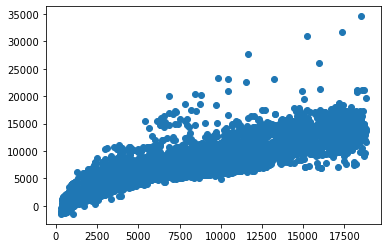

In [57]:
plt.scatter(y_test, predictions)


In [58]:
#Accuracy Score of 86.8%
print("Score:", lm.score(x_test, y_test))

Score: 0.8679813053205264


In [59]:
#Examining Error
#numbers may not be accorate as I had to Pseudocode string data into numbers to make the linear regression table work

In [60]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test, predictions)
#High Error rate

916.3934560513005

In [61]:
#Mean Squared Error
metrics.mean_squared_error(y_test, predictions)

2097264.116568206

In [62]:
#Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1448.1933975019379

In [63]:
#k-Fold Cross Validation in Python
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [64]:
#Create the folds
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     1     4 ... 53937 53938 53939], test: [    2     3     8 ... 53932 53934 53935]
train: [    1     2     3 ... 53935 53938 53939], test: [    0     4     6 ... 53933 53936 53937]
train: [    0     2     3 ... 53935 53936 53937], test: [    1     5     9 ... 53931 53938 53939]


C:\Users\music\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [65]:
print(cross_val_score(lm, x,y, cv=3))
# The percentages vary between -93% to 71% using data sets for testing scores

[ 0.05105015  0.71683548 -0.92644159]
